In [1]:
import numpy as np

# Create a sample matrix
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Perform SVD
U, S, Vt = np.linalg.svd(A)

# Print the results
print("Left singular vectors:")
print(U)

print("\nSingular values:")
print(np.diag(S))

print("\nRight singular vectors:")
print(Vt)


Left singular vectors:
[[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]

Singular values:
[[1.68481034e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.06836951e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.41842475e-16]]

Right singular vectors:
[[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


In [2]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Load the data
X = np.loadtxt('data.txt')

# Create a TruncatedSVD object with k components
k = 2
svd = TruncatedSVD(n_components=k)

# Fit the data to the SVD model and transform it
X_reduced = svd.fit_transform(X)

# Print the results
print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)


Original shape: (5, 4)
Reduced shape: (5, 2)


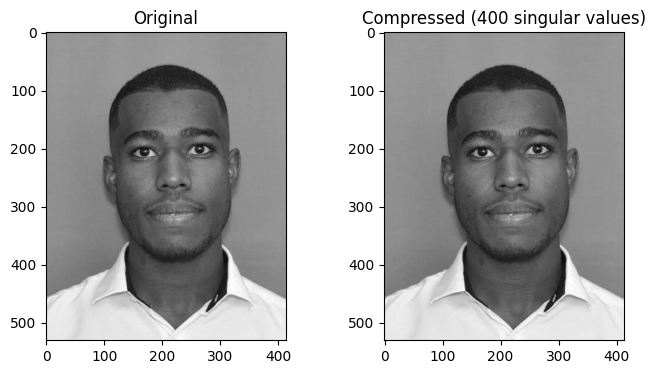

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('image omar.jpg')

# Convert the image to grayscale
gray_img = np.mean(img, axis=2)

# Perform SVD
U, S, Vt = np.linalg.svd(gray_img)

# Choose the number of singular values to keep
k = 400

# Construct the compressed image using the truncated SVD
compressed_img = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

# Plot the original and compressed images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(gray_img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(compressed_img, cmap='gray')
axs[1].set_title(f'Compressed ({k} singular values)')
plt.show()


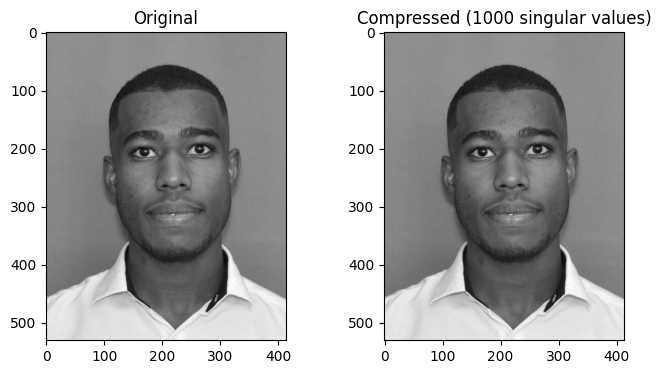

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
img = Image.open('image omar.jpg')

# Convert the image to grayscale
gray_img = img.convert('L')

# Convert the image to a numpy array
A = np.asarray(gray_img)

# Perform SVD
U, s, Vt = np.linalg.svd(A, full_matrices=False)

# Choose the number of singular values to keep
k = 1000

# Construct the compressed image using the truncated SVD
Ak = np.dot(U[:,:k], np.dot(np.diag(s[:k]), Vt[:k,:]))

# Plot the original and compressed images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(A, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(Ak, cmap='gray')
axs[1].set_title(f'Compressed ({k} singular values)')
plt.show()
